In [74]:
import tensorflow as tf
from tensorflow import keras
import  matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [75]:
(X_train,Y_train) , (X_test,Y_test) = keras.datasets.mnist.load_data()

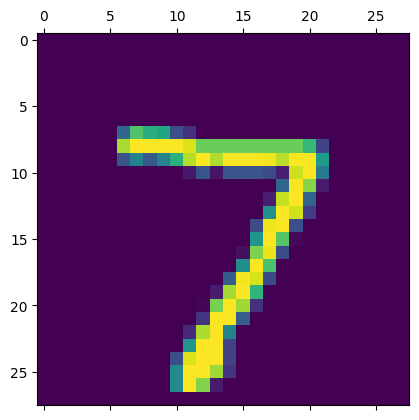

In [76]:
plt.matshow(X_test[0])

In [77]:
X_train.shape

(60000, 28, 28)

In [78]:
X_train = X_train / 255
X_test = X_test / 255

In [79]:
X_train_flattened = X_train.reshape(len(X_train,),28*28)
X_train_flattened.shape

(60000, 784)

In [80]:
X_test_flattened = X_test.reshape(len(X_test,),28*28)
X_test_flattened.shape

(10000, 784)

In [81]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=9)



Epoch 1/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4710 - accuracy: 0.8759
Epoch 2/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3041 - accuracy: 0.9146
Epoch 3/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9213
Epoch 4/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2736 - accuracy: 0.9231
Epoch 5/9
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2666 - accuracy: 0.9254
Epoch 6/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2622 - accuracy: 0.9267
Epoch 7/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9279
Epoch 8/9
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2552 - accuracy: 0.9291
Epoch 9/9
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2530 - accuracy: 0.9301


In [82]:
model.evaluate(X_test_flattened, Y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2644 - accuracy: 0.9275


[0.26441195607185364, 0.9275000095367432]

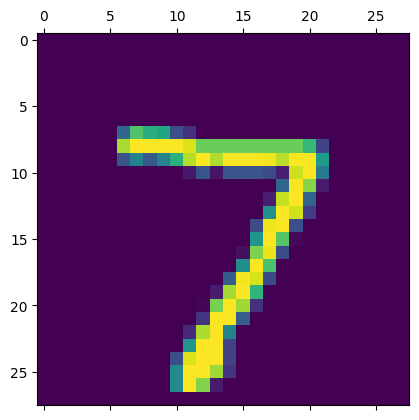

In [83]:
plt.matshow(X_test[0])

In [84]:
y_predicted = model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


In [85]:
y_predicted[0]

array([5.4221014e-03, 2.1500339e-08, 1.8114457e-02, 9.7000837e-01,
       8.8834437e-04, 9.5642105e-02, 5.4573434e-08, 9.9973816e-01,
       7.8628398e-02, 6.4878213e-01], dtype=float32)

In [86]:
np.argmax(y_predicted[9])

9

In [87]:
y_predicted_lables = [np.argmax(i) for i in y_predicted]
y_predicted_lables[:5]

[7, 2, 1, 0, 4]

In [93]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 962,    0,    1,    2,    0,    5,    7,    2,    1,    0],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   6,   10,  924,   16,    7,    4,   14,    8,   39,    4],
       [   3,    0,   16,  928,    1,   19,    4,    9,   24,    6],
       [   1,    1,    4,    2,  910,    0,   14,    4,   10,   36],
       [   9,    3,    2,   37,    9,  768,   18,    8,   32,    6],
       [   9,    3,    5,    1,    7,    9,  921,    2,    1,    0],
       [   1,    7,   24,    7,    6,    1,    0,  943,    5,   34],
       [   6,   11,    6,   20,    9,   18,   11,    6,  879,    8],
       [  10,    8,    1,   13,   28,    5,    0,   13,    8,  923]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

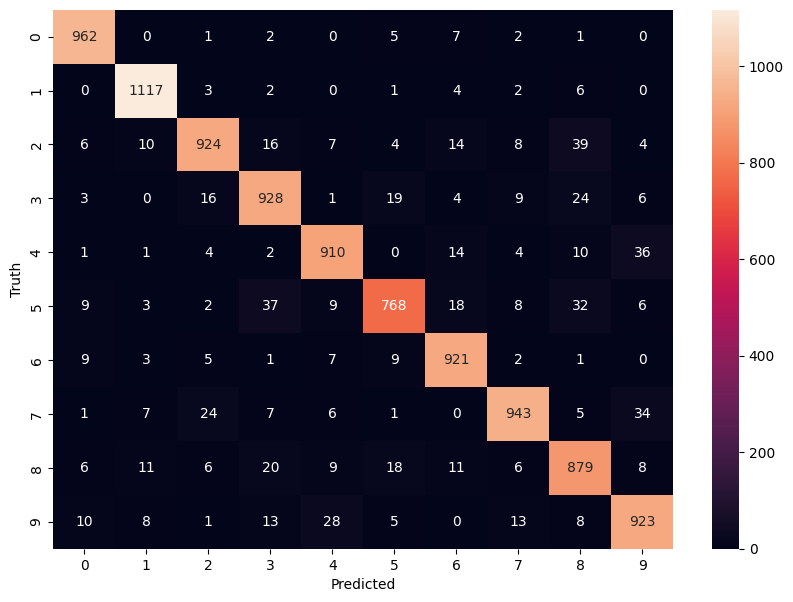

In [94]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [96]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2777 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1305 - accuracy: 0.9620
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0918 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0690 - accuracy: 0.9791
Epoch 5/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0542 - accuracy: 0.9828


In [97]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.0865 - accuracy: 0.9739


[0.08649034053087234, 0.9739000201225281]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

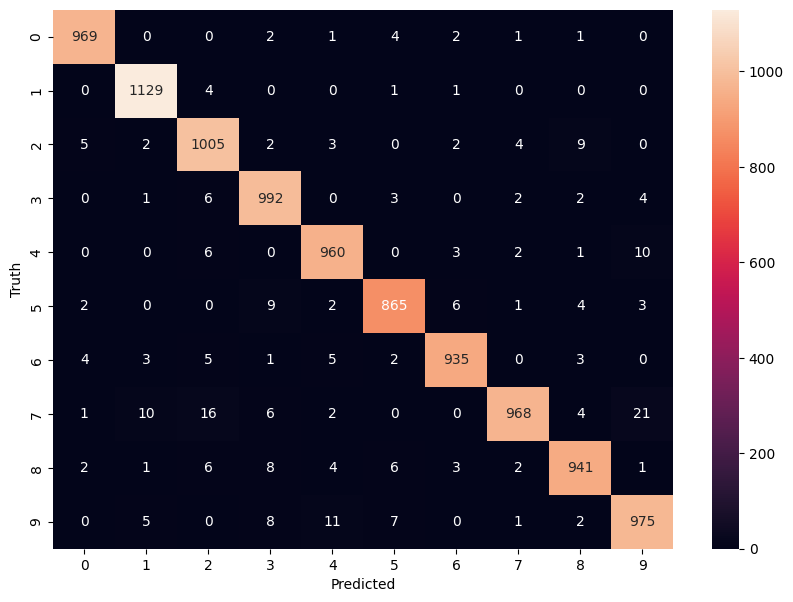

In [99]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [101]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 0.2767 - accuracy: 0.9216
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1291 - accuracy: 0.9617
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0892 - accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0677 - accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0531 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0422 - accuracy: 0.9868
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0282 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0235 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.01

In [ ]:
model.evaluate(X_test,y_test)